In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

In [9]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def thompson(L,C):

    L = L*(10**(-3))
    C = C*(10**(-12))
    
    return np.sqrt(1/(L*C))

# **ÚLOHA 2/3**

In [3]:
def resonance_circuit(R,L,C,t):
    
    t = t*(10**(-3))
    L = L*(10**(-3))
    C = C*(10**(-12))
   

    d = R/(2*L)
    w0 = np.sqrt(1/(L*C))
    w = np.sqrt((w0**2-d**2))
    return (1/R) * np.exp(-d*t)*np.sin(w*t)

In [4]:
w0 = thompson(1,500)
print(w0)

1414213.562373095


C:\Users\stepa\AppData\Local\Temp/ipykernel_11320/1550438990.py:19: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


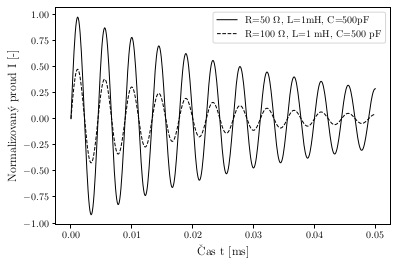

In [10]:
t = np.linspace(0,0.05,500)

plt.figure(figsize = (6,4))


plt.plot(t, resonance_circuit(50,1,500,t)/(1/50), color="k", linewidth=1, label='R=50 $\Omega$, L=1mH, C=500pF')
plt.plot(t, resonance_circuit(100,1,500,t)/(1/50), color="k", linestyle='dashed', linewidth=1, label='R=100 $\Omega$, L=1 mH, C=500 pF')

plt.legend(loc='upper right', fontsize=10)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("Normalizovaný proud I [-]", fontsize=12)
plt.xlabel("Čas t [ms]", fontsize=12)



plt.savefig('R.pdf')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_11320/2279519431.py:19: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


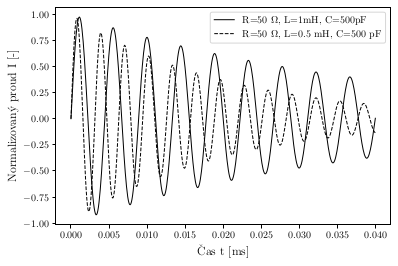

In [11]:
t = np.linspace(0,0.04,500)

plt.figure(figsize = (6,4))


plt.plot(t, resonance_circuit(50,1,500,t)/(1/50), color="k", linewidth=1, label='R=50 $\Omega$, L=1mH, C=500pF')
plt.plot(t, resonance_circuit(50,0.5,500,t)/(1/50), color="k", linestyle='dashed', linewidth=1, label='R=50 $\Omega$, L=0.5 mH, C=500 pF')

plt.legend(loc='upper right', fontsize=10)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("Normalizovaný proud I [-]", fontsize=12)
plt.xlabel("Čas t [ms]", fontsize=12)



plt.savefig('L.pdf')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_11320/3123209988.py:19: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


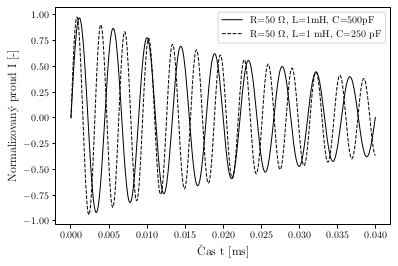

In [12]:
t = np.linspace(0,0.04,500)

plt.figure(figsize = (6,4))


plt.plot(t, resonance_circuit(50,1,500,t)/(1/50), color="k", linewidth=1, label='R=50 $\Omega$, L=1mH, C=500pF')
plt.plot(t, resonance_circuit(50,1,250,t)/(1/50), color="k", linestyle='dashed', linewidth=1, label='R=50 $\Omega$, L=1 mH, C=250 pF')

plt.legend(loc='upper right', fontsize=10)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("Normalizovaný proud I [-]", fontsize=12)
plt.xlabel("Čas t [ms]", fontsize=12)



plt.savefig('C.pdf')
plt.show()

# **IMPORT DAT**

In [44]:
frequency,amplitude_core = np.genfromtxt("data_core.csv", unpack=True)
_, amplitude_no_core = np.genfromtxt("data_no_core.csv", unpack=True, delimiter=",")
print(amplitude_no_core)
print(amplitude_core)

[ 84.8  99.2 115.2 140.  160.  200.  252.  336.  464.  672.  864.  704.
 496.  368.  280.  228.  192.  168.  144.  128. ]
[124.8 144.4 168.  196.  228.  264.  308.  368.  416.  448.  464.  448.
 416.  376.  336.  304.  272.  240.  220.  200. ]


# **ÚLOHA 4**

In [45]:
def V_to_I(x):
    return x/5

In [46]:
def resonance_func(f,Imax, Q, f0):
    return Imax/np.sqrt(1 + Q*(f/f0 - f0/f)**2)
    

In [47]:
amplitude_core_I = V_to_I(amplitude_core)/2
amplitude_no_core_I = V_to_I(amplitude_no_core)/2

In [48]:
parameters_core, core_err = curve_fit(resonance_func, frequency, amplitude_core_I, p0=[150,7,210])
parameters_no_core, no_core_err = curve_fit(resonance_func, frequency, amplitude_no_core_I, p0=[90,7,210])

print(parameters_core)
print(parameters_no_core)
core_err = np.sqrt(np.diag(core_err))
no_core_err = np.sqrt(np.diag(no_core_err))

Imax1, Q1, f01 = parameters_core
Imax2, Q2, f02 = parameters_no_core

#[173.24573528  64.28372005 210.00319446]
#[ 93.05581631   7.1868643  208.69760004]

[ 46.52790928   7.18686519 208.69759797]
[ 86.62286712  64.28371787 210.00319366]


C:\Users\stepa\AppData\Local\Temp/ipykernel_11320/2684843273.py:22: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


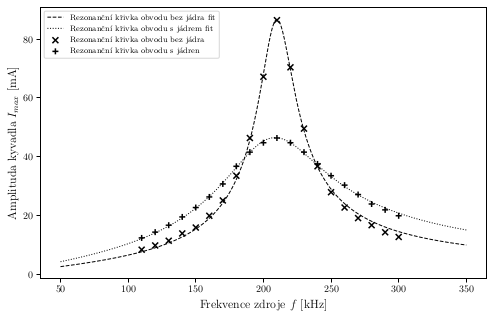

In [49]:
x_range = np.linspace(50,350,500)

plt.figure(figsize = (8,5))

plt.scatter(frequency,amplitude_no_core_I, marker = 'x', color='black', label='Rezonanční křivka obvodu bez jádra')
plt.scatter(frequency,amplitude_core_I, marker = '+', color='black', label='Rezonanční křivka obvodu s jádren')


plt.plot(x_range, resonance_func(x_range, Imax2, Q2, f02), color="k", linestyle='dashed', linewidth=1, label='Rezonanční křivka obvodu bez jádra fit')
plt.plot(x_range, resonance_func(x_range, Imax1, Q1, f01), color="k", linestyle='dotted', linewidth=1, label='Rezonanční křivka obvodu s jádrem fit')

plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("Amplituda kyvadla $I_{max}$ [mA]", fontsize=12)
plt.xlabel("Frekvence zdroje $f$ [kHz]", fontsize=12)



plt.savefig('Resonance_curve.pdf')
plt.show()


In [50]:
print(parameters_core)
print(core_err)
print(parameters_no_core)
print(no_core_err)

[ 46.52790928   7.18686519 208.69759797]
[0.23272632 0.15995117 0.30674903]
[ 86.62286712  64.28371787 210.00319366]
[0.98176991 2.58976966 0.24578579]


In [51]:
T = np.array([np.concatenate((parameters_core, core_err)),np.concatenate((parameters_no_core, no_core_err))])

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrr}
\toprule
 46.5279 &  7.18687 & 208.698 & 0.232726 & 0.159951 & 0.306749 \\
 86.6229 & 64.2837  & 210.003 & 0.98177  & 2.58977  & 0.245786 \\
\bottomrule
\end{tabular}


In [52]:
T = np.array([parameters_core,parameters_no_core])

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 46.5279 &  7.18687 & 208.698 \\
 86.6229 & 64.2837  & 210.003 \\
\bottomrule
\end{tabular}


In [54]:
T = np.array([frequency, amplitude_no_core_I, amplitude_core_I]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 110 &  8.48 & 12.48 \\
 120 &  9.92 & 14.44 \\
 130 & 11.52 & 16.8  \\
 140 & 14    & 19.6  \\
 150 & 16    & 22.8  \\
 160 & 20    & 26.4  \\
 170 & 25.2  & 30.8  \\
 180 & 33.6  & 36.8  \\
 190 & 46.4  & 41.6  \\
 200 & 67.2  & 44.8  \\
 210 & 86.4  & 46.4  \\
 220 & 70.4  & 44.8  \\
 230 & 49.6  & 41.6  \\
 240 & 36.8  & 37.6  \\
 250 & 28    & 33.6  \\
 260 & 22.8  & 30.4  \\
 270 & 19.2  & 27.2  \\
 280 & 16.8  & 24    \\
 290 & 14.4  & 22    \\
 300 & 12.8  & 20    \\
\bottomrule
\end{tabular}


# **ULOHA 5**

In [28]:
f = np.array([211,198.4,186.3,177.8,169.4])
C1 = np.array([500,600,700,800,900])
C2 = np.array([89.1,190,289.5,388.5,492.5])
Cx = C1 - C2
print(Cx)

[410.9 410.  410.5 411.5 407.5]


In [29]:
cx = mean(Cx)
scx = error(Cx)

In [30]:
exp = np.log10(scx)
exp_floor = int(np.floor(exp))  # je potreba pretypovat vysledek na cele cislo
print(exp, exp_floor)

chyba = np.round(scx, -exp_floor)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(cx, -exp_floor)
print(hodnota)

jednotka = 'pF'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

-0.2094691300986591 -1
0.6
410.1
$(410.1\pm0.6)$~pF


In [31]:
T = np.array([f,C1,C2,Cx]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
 211   & 500 &  89.1 & 410.9 \\
 198.4 & 600 & 190   & 410   \\
 186.3 & 700 & 289.5 & 410.5 \\
 177.8 & 800 & 388.5 & 411.5 \\
 169.4 & 900 & 492.5 & 407.5 \\
\bottomrule
\end{tabular}
